In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MinMaxScaler
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [2]:
import pandas as pd
import numpy as np

filename = "Hotel Reservations.csv"

data = pd.read_csv(filename)

# Analysis of the data

1st. Change the string parameters to int parameters to see the correlations.

2nd. Group some categories.

3rd. Study the correlations again.

#### The dataset

In [3]:
data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [4]:
data.rename(columns={"Booking_ID": "Booking ID"}, inplace=True)
data.rename(columns={"no_of_adults": "# adults"}, inplace=True)
data.rename(columns={"no_of_children": "# childrens"}, inplace=True)
data.rename(columns={"no_of_weekend_nights": "# weekend nights"}, inplace=True)
data.rename(columns={"no_of_week_nights": "# week nights"}, inplace=True)
data.rename(columns={"type_of_meal_plan": "Meal plan"}, inplace=True)
data.rename(columns={"required_car_parking_space": "Parking"}, inplace=True)
data.rename(columns={"room_type_reserved": "Room type"}, inplace=True)
data.rename(columns={"lead_time": "Lead time"}, inplace=True)
data.rename(columns={"arrival_year": "Arrival year"}, inplace=True)
data.rename(columns={"arrival_month": "Arrival month"}, inplace=True)
data.rename(columns={"arrival_date": "Arrival date"}, inplace=True)
data.rename(columns={"market_segment_type": "Market segment type"}, inplace=True)
data.rename(columns={"repeated_guest": "Repeated guest"}, inplace=True)
data.rename(columns={"no_of_previous_cancellations": "# previous cancellations"}, inplace=True)
data.rename(columns={"no_of_previous_bookings_not_canceled": "# previous bookings not cancelled"}, inplace=True)
data.rename(columns={"avg_price_per_room": "Average price"}, inplace=True)
data.rename(columns={"no_of_special_requests": "# special requests"}, inplace=True)
data.rename(columns={"booking_status": "Booking status"}, inplace=True)

In [5]:
data.head(10)

,Booking ID,# adults,# childrens,# weekend nights,# week nights,Meal plan,Parking,Room type,Lead time,Arrival year,Arrival month,Arrival date,Market segment type,Repeated guest,# previous cancellations,# previous bookings not cancelled,Average price,# special requests,Booking status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [6]:
data.shape

(36275, 19)

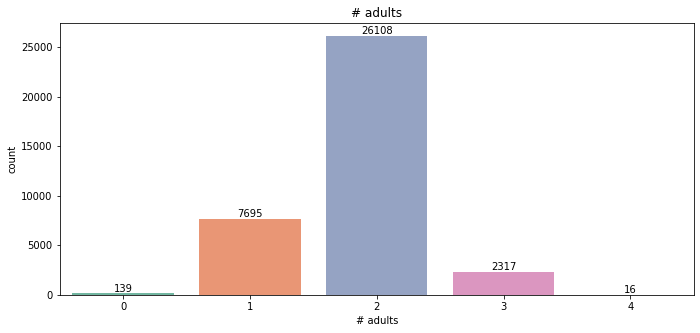

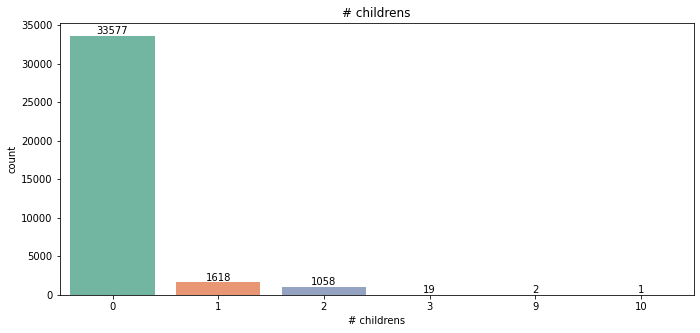

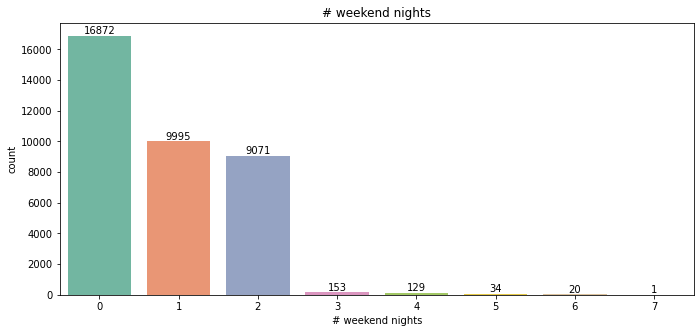

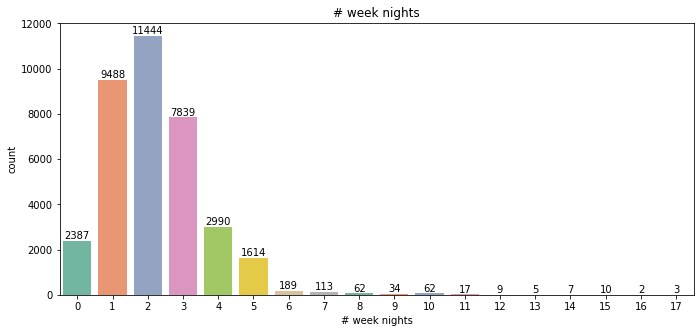

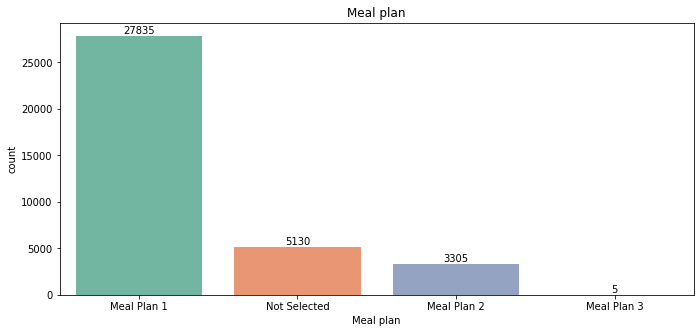

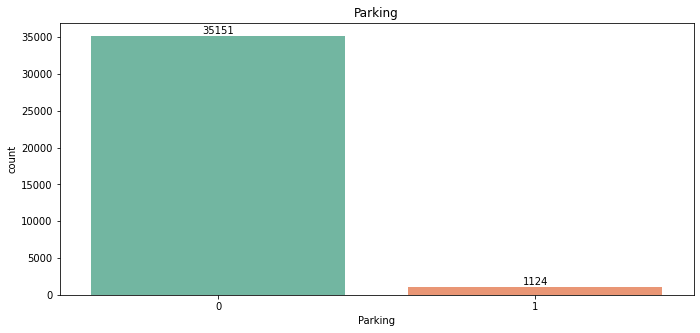

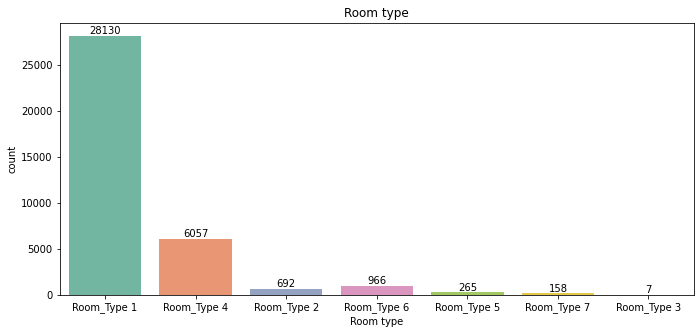

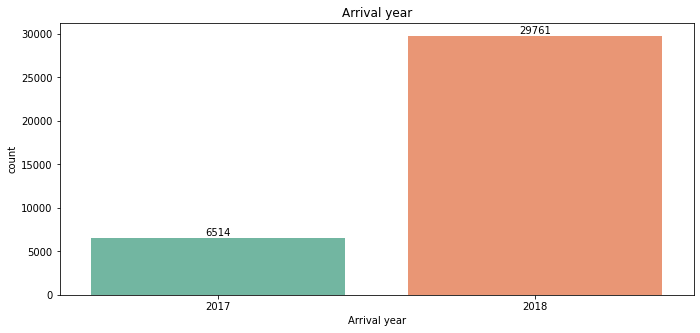

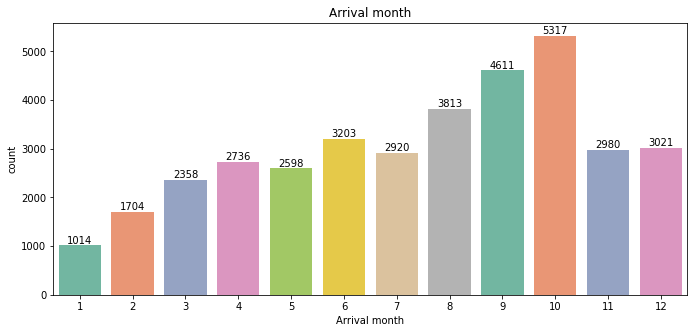

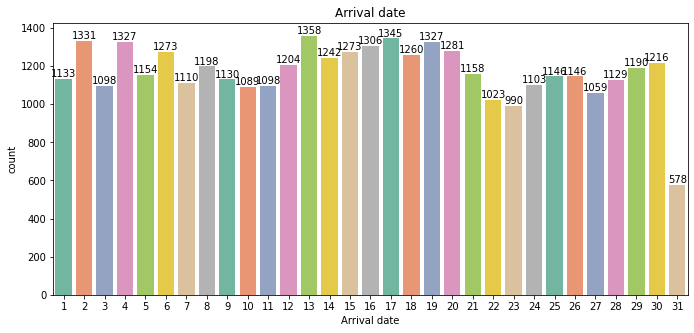

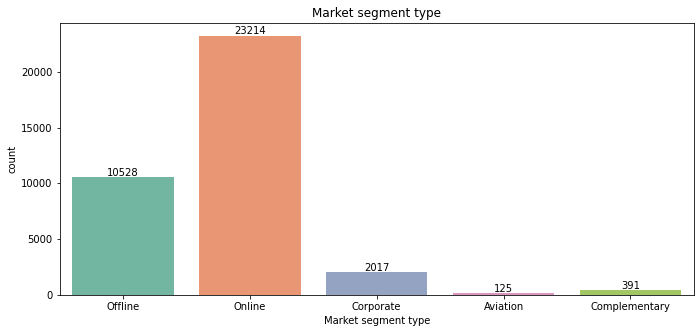

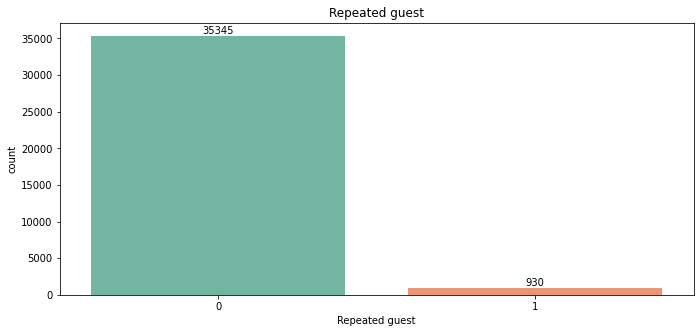

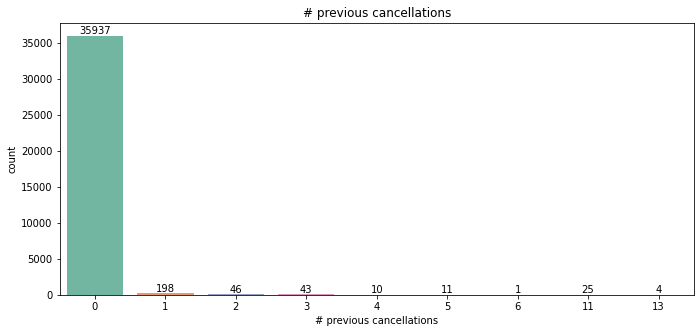

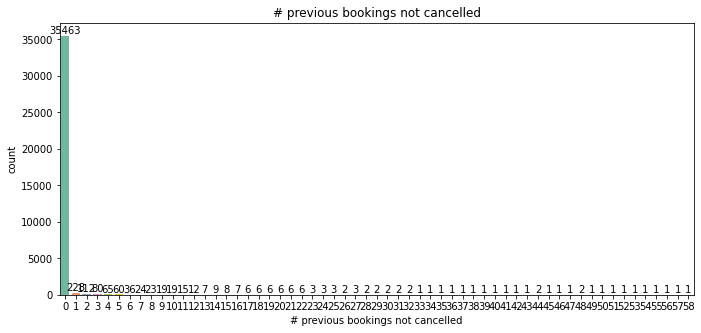

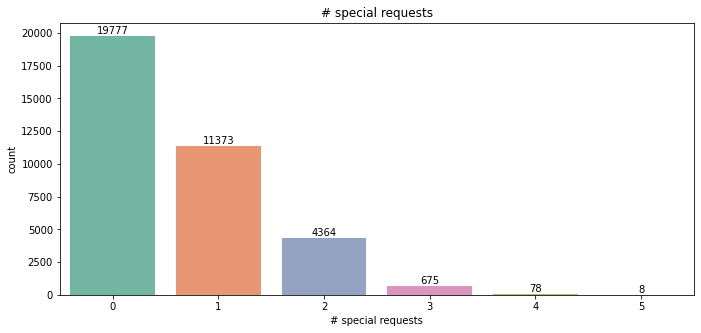

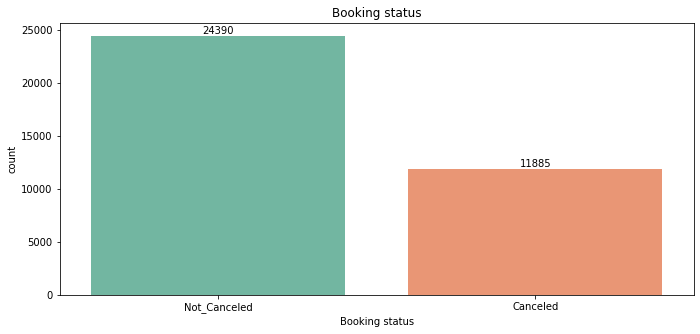

In [7]:
plot_col = ["# adults", "# childrens", "# weekend nights", "# week nights", "Meal plan", "Parking",
            "Room type", "Arrival year", "Arrival month", "Arrival date", "Market segment type", "Repeated guest",
            "# previous cancellations", "# previous bookings not cancelled", "# special requests",
            "Booking status"]

for i in plot_col:
    plt.figure(figsize = (25,5))

    plt.subplot(1,2,1)
    plt.gca().set_title(i)
    ax=sns.countplot(x = i, palette = 'Set2', data = data)
    ax.bar_label(ax.containers[0])
    plt.show()

In [8]:
for i in plot_col:
    print(data[i].value_counts(), "\n")

2    26108
1     7695
3     2317
0      139
4       16
Name: # adults, dtype: int64 

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: # childrens, dtype: int64 

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: # weekend nights, dtype: int64 

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
8        62
10       62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: # week nights, dtype: int64 

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: Meal plan, dtype: int64 

0    35151
1     1124
Name: Parking, dtype: int64 

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: Room type, dtype: int64 

2018    29761
2017     6514
Name: Arrival year, dtype: int64 

10    5317
9   

### Grouping variables

Number of childrens:
- 0 if 0 children.
- 1 if 1 children.
- 2 if 2 or more children.

Number of weekend nights:
- 0 if 0 nights.
- 1 if 1 nights.
- 2 if 2 nights.
- 3 if more than 2 nights.

Number of week nights:
- value if value nights (0 < value < 7).
- 7 for 7 or more nights.

Room type reserved:
- 0 if room type 1.
- 1 if room type 4.
- 1 any other room.

Market segment type:
- 0 if offline.
- 1 if online.
- 2 if other.

Number of previous cancellations:
- 0 if no.
- 1 if any cancellation.

Number of previous bookings not cancelled:
- 0 if 0 uncancelled previous booking, i.e. no fulfilled booking
- 1 if more than 1 uncancelled previous booking, i.e. at least 1 fulfilled booking

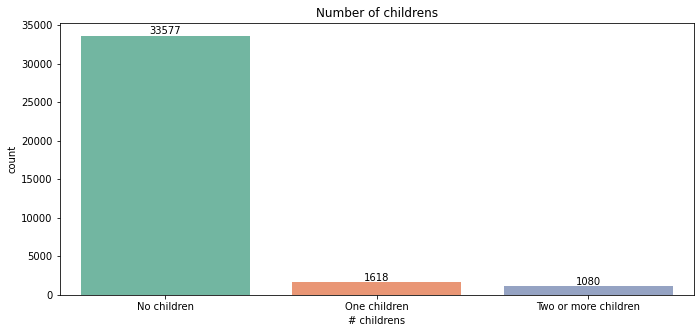

In [9]:
def children(value):
    if value == 0:
        return 0
    elif value == 1:
        return 1
    else:
        return 2

data[["# childrens"]] = data.apply(lambda x: children(x['# childrens']), axis=1)

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.gca().set_title("Number of childrens")
ax = sns.countplot(x = "# childrens" , palette = 'Set2', data = data)
ax.bar_label(ax.containers[0])

plt.xticks([0,1,2], ["No children", "One children", "Two or more children"])

plt.show()

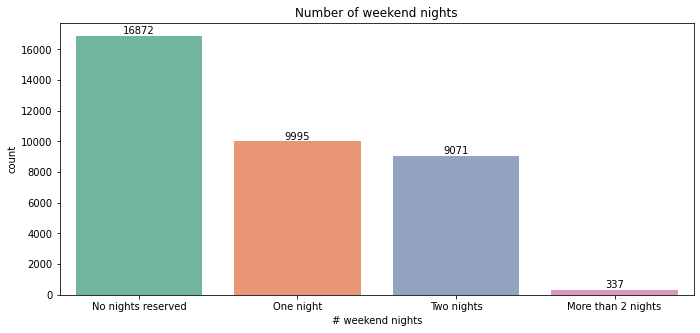

In [10]:
def weekend_nights(value):
    if value == 0:
        return 0
    elif value == 1:
        return 1
    elif value == 2:
        return 2
    else:
        return 3

data[["# weekend nights"]] = data.apply(lambda x: weekend_nights(x['# weekend nights']), axis=1)

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.gca().set_title("Number of weekend nights")
ax=sns.countplot(x = "# weekend nights" , palette = 'Set2', data = data)
ax.bar_label(ax.containers[0])

plt.xticks([0,1,2,3],["No nights reserved", "One night", "Two nights", "More than 2 nights"])

plt.show()

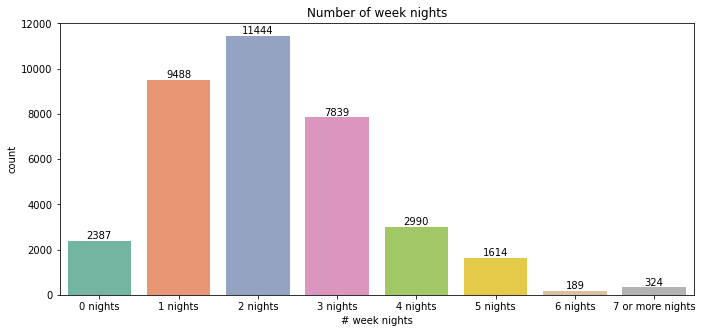

In [11]:
def week_nights(value):
    if value >= 7:
        return 7
    else:
        return value

data[["# week nights"]] = data.apply(lambda x: week_nights(x['# week nights']), axis=1)

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.gca().set_title("Number of week nights")
ax=sns.countplot(x = "# week nights" , palette = 'Set2', data = data)
ax.bar_label(ax.containers[0])

plt.xticks([0,1,2,3,4,5,6,7],
           ["0 nights", "1 nights", "2 nights", "3 nights", "4 nights", "5 nights", "6 nights", "7 or more nights"])

plt.show()

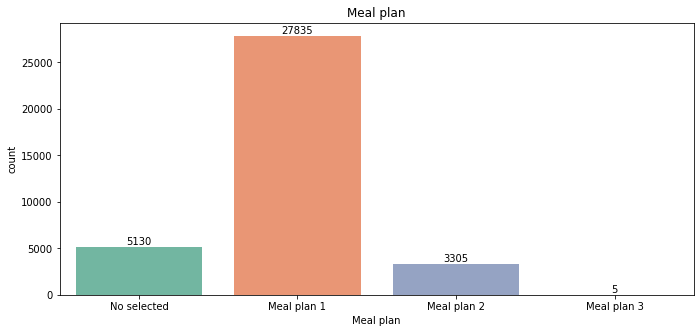

In [12]:
def meals(value):
    if value == "Not Selected":
        return 0
    elif value == "Meal Plan 1":
        return 1
    elif value == "Meal Plan 2":
        return 2
    elif value == "Meal Plan 3":
        return 3

data[["Meal plan"]] = data.apply(lambda x: meals(x['Meal plan']), axis=1)

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.gca().set_title("Meal plan")
ax = sns.countplot(x = "Meal plan" , palette = 'Set2', data = data)
ax.bar_label(ax.containers[0])

plt.xticks([0, 1, 2, 3], ["No selected", "Meal plan 1", "Meal plan 2", "Meal plan 3"])

plt.show()

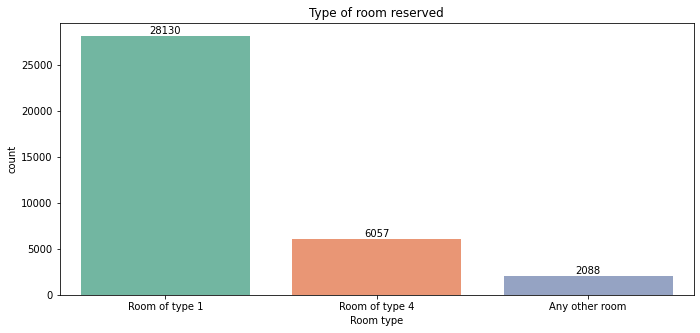

In [13]:
def room_type(value):
    if value == "Room_Type 1":
        return 0
    elif value == "Room_Type 4":
        return 1
    else:
        return 2
    

data[["Room type"]] = data.apply(lambda x: room_type(x["Room type"]), axis=1)

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.gca().set_title("Type of room reserved")
ax=sns.countplot(x = "Room type", palette = 'Set2', data = data)
ax.bar_label(ax.containers[0])

plt.xticks([0,1, 2], ["Room of type 1", "Room of type 4", "Any other room"])

plt.show()

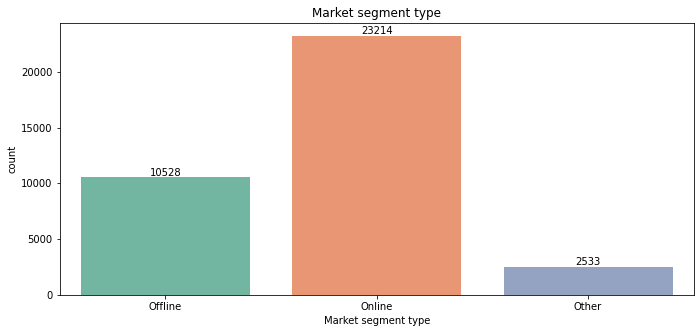

In [14]:
def market_segment_type(value):
    if value == "Offline":
        return 0
    if value == "Online":
        return 1
    else:
        return 2
    
data[["Market segment type"]] = data.apply(lambda x: market_segment_type(x["Market segment type"]), axis=1)

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.gca().set_title("Market segment type")
ax=sns.countplot(x = "Market segment type", palette = 'Set2', data = data)
ax.bar_label(ax.containers[0])

plt.xticks([0,1,2], ["Offline", "Online", "Other"])

plt.show()

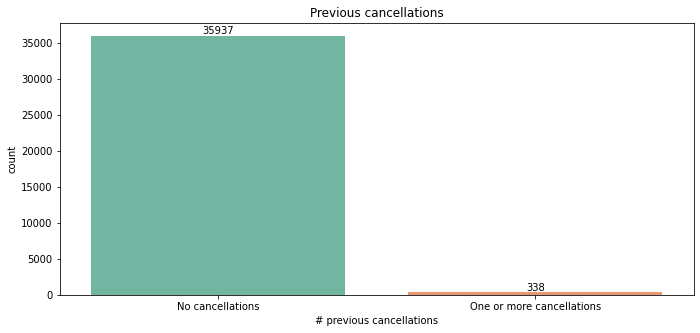

In [15]:
def previous_cancellations(value):
    if value == 0:
        return 0
    else:
        return 1

data[["# previous cancellations"]] = data.apply(lambda x: previous_cancellations(x["# previous cancellations"]), axis=1)

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.gca().set_title("Previous cancellations")
ax=sns.countplot(x = "# previous cancellations", palette = 'Set2', data = data)
ax.bar_label(ax.containers[0])

plt.xticks([0,1], ["No cancellations", "One or more cancellations"])

plt.show()

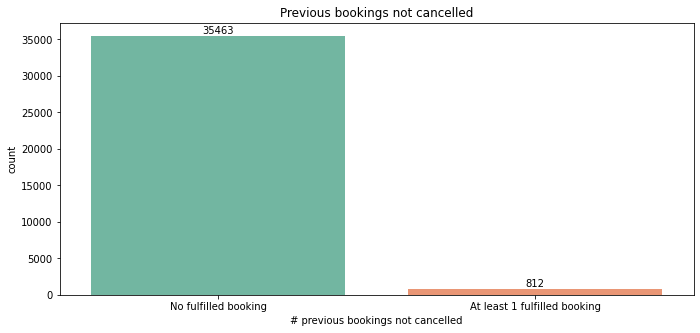

In [16]:
def previous_bookings_not_cancelled(value):
    if value == 0:
        return 0
    else:
        return 1
    
data[["# previous bookings not cancelled"]] = data.apply(lambda x: previous_bookings_not_cancelled(x["# previous bookings not cancelled"]), axis=1)

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.gca().set_title("Previous bookings not cancelled")
ax=sns.countplot(x = "# previous bookings not cancelled", palette = 'Set2', data = data)
ax.bar_label(ax.containers[0])

plt.xticks([0,1], ["No fulfilled booking", "At least 1 fulfilled booking"])

plt.show()

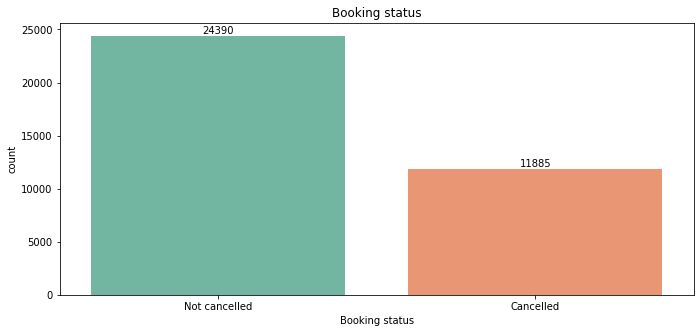

In [17]:
def booking_status(value):
    if value == "Not_Canceled":
        return 0
    else:
        return 1
    
data[["Booking status"]] = data.apply(lambda x: booking_status(x["Booking status"]), axis=1)

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.gca().set_title("Booking status")
ax=sns.countplot(x = "Booking status", palette = 'Set2', data = data)
ax.bar_label(ax.containers[0])

plt.xticks([0,1], ["Not cancelled", "Cancelled"])

plt.show()

### Correlation matrix

In [18]:
data.head()

,Booking ID,# adults,# childrens,# weekend nights,# week nights,Meal plan,Parking,Room type,Lead time,Arrival year,Arrival month,Arrival date,Market segment type,Repeated guest,# previous cancellations,# previous bookings not cancelled,Average price,# special requests,Booking status
0,INN00001,2,0,1,2,1,0,0,224,2017,10,2,0,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,0,0,0,5,2018,11,6,1,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,1,0,0,1,2018,2,28,1,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,1,0,0,211,2018,5,20,1,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,0,0,0,48,2018,4,11,1,0,0,0,94.50,0,1


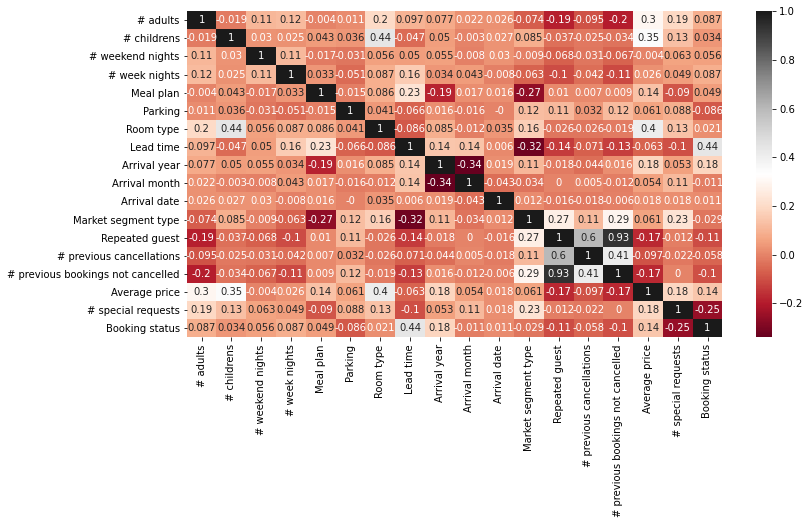

In [19]:
corr_matrix = data.corr().round(3)
fig3 =  plt.subplots(figsize=(12,6))
sns.heatmap(data=corr_matrix, annot=True, cmap = 'RdGy')
plt.show()

### Average prices

In [20]:
data[["Average price"]].value_counts()

Average price
65.00            848
75.00            826
90.00            703
95.00            669
115.00           662
                ... 
100.84             1
151.43             1
100.94             1
100.95             1
540.00             1
Length: 3930, dtype: int64

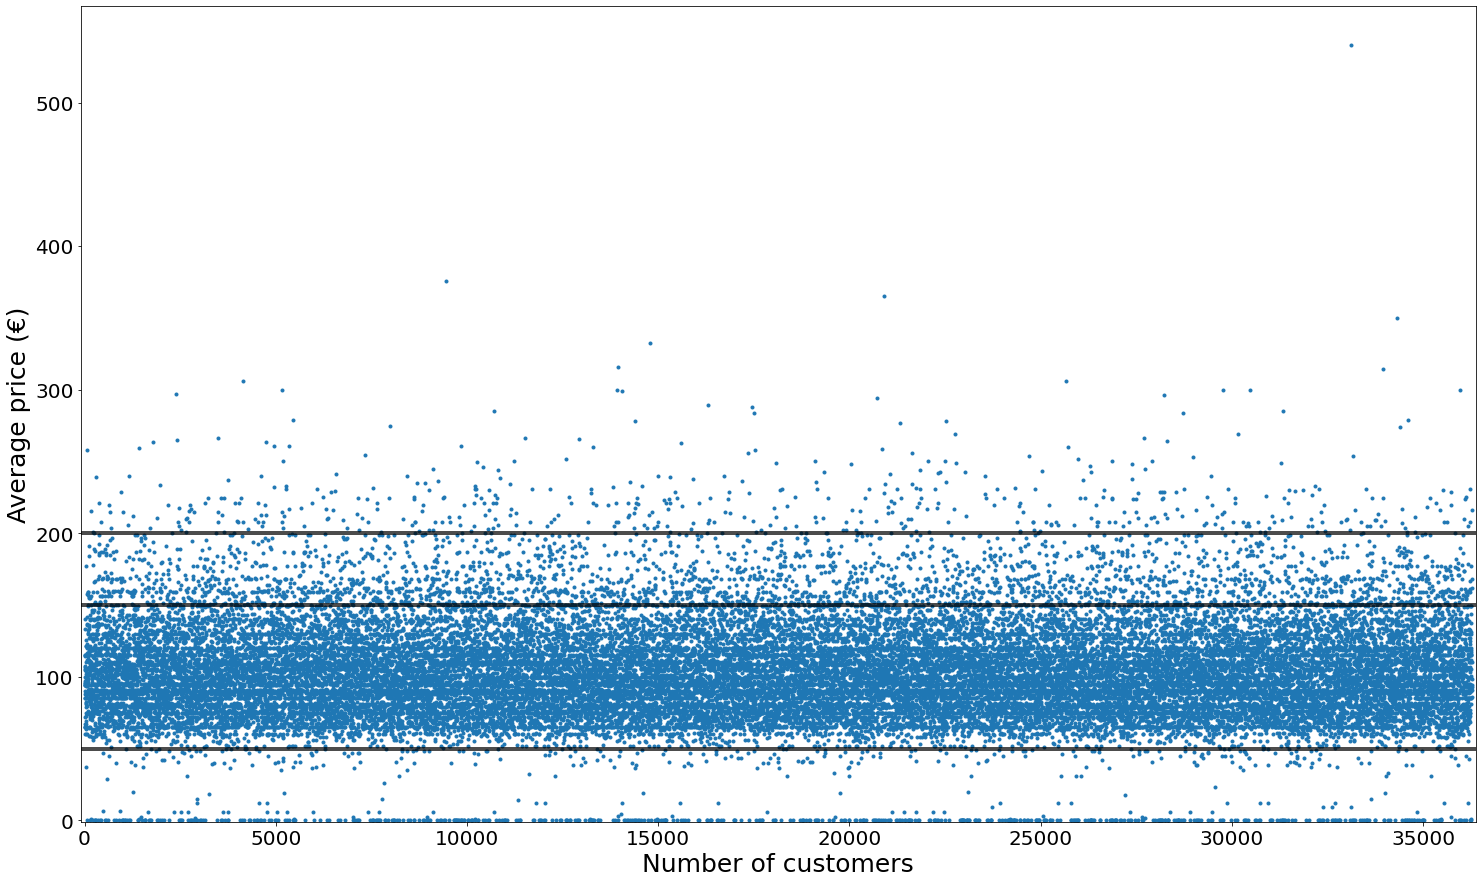

In [21]:
plt.figure(figsize = (25,15))
plt.scatter(x=range(len(data[["Average price"]])), y=data[["Average price"]], marker='.')

plt.hlines(xmin = -100, xmax = len(data[["Average price"]])+100, y=50, color = "k", linewidth=4, alpha=0.7)
plt.hlines(xmin = -100, xmax = len(data[["Average price"]])+100, y=150, color = "k", linewidth=4, alpha=0.7)
plt.hlines(xmin = -100, xmax = len(data[["Average price"]])+100, y=200, color = "k", linewidth=4, alpha=0.7)
plt.xlim(-100,len(data[["Average price"]])+100)

plt.ylabel("Average price (€)", fontsize=25)
plt.yticks(fontsize=20)

plt.xlabel("Number of customers", fontsize=25)
plt.xticks(fontsize=20)
plt.ylim(ymin=-1)

plt.show()

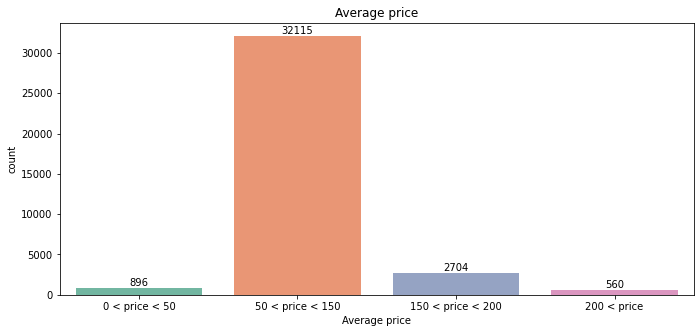

In [22]:
def average_price(value):
    if value < 50.:
        return 0
    elif value > 50. and value < 150.:
        return 1
    elif value >150. and value < 200.:
        return 2
    else:
        return 3
    
data[["Average price"]] = data.apply(lambda x: average_price(x["Average price"]), axis=1)

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.gca().set_title("Average price")
ax=sns.countplot(x = "Average price", palette = 'Set2', data = data)
ax.bar_label(ax.containers[0])

plt.xticks([0,1,2,3], ["0 < price < 50", "50 < price < 150", "150 < price < 200", "200 < price"])

plt.show()

### Lead time

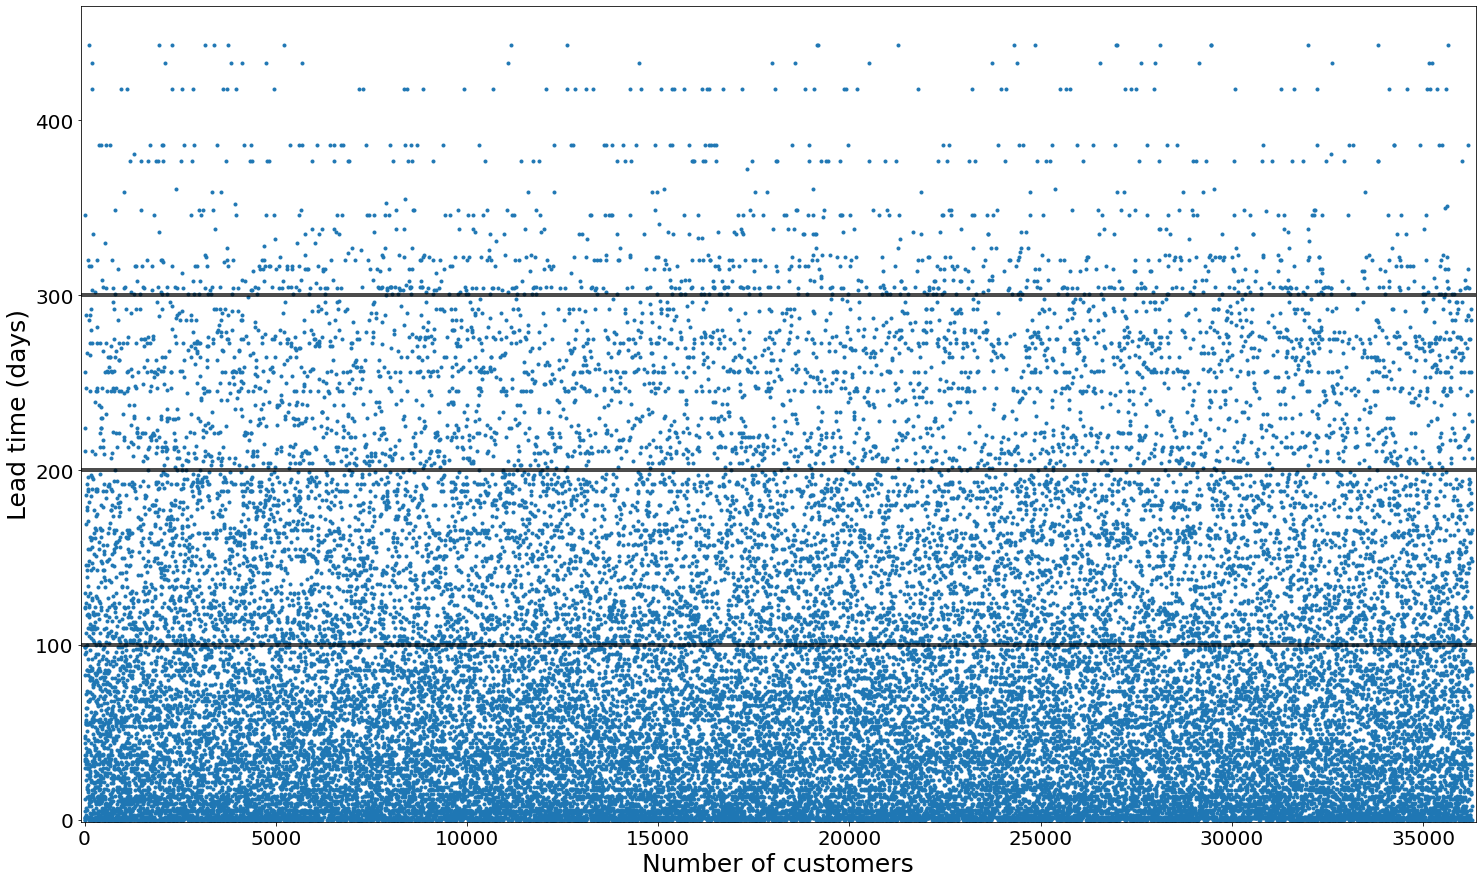

In [23]:
plt.figure(figsize = (25,15))
plt.scatter(x=range(len(data[["Lead time"]])), y=data[["Lead time"]], marker='.')

plt.hlines(xmin = -100, xmax = len(data[["Average price"]])+100, y=100, color = "k", linewidth=4, alpha=0.7)
plt.hlines(xmin = -100, xmax = len(data[["Average price"]])+100, y=200, color = "k", linewidth=4, alpha=0.7)
plt.hlines(xmin = -100, xmax = len(data[["Average price"]])+100, y=300, color = "k", linewidth=4, alpha=0.7)
plt.xlim(-100,len(data[["Average price"]])+100)

plt.ylabel("Lead time (days)", fontsize=25)
plt.yticks(fontsize=20)

plt.xlabel("Number of customers", fontsize=25)
plt.xticks(fontsize=20)
plt.ylim(ymin=-1)

plt.show()

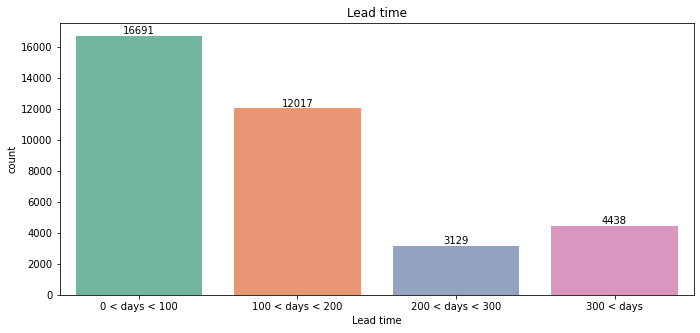

In [24]:
def lead_time(value):
    if value < 100.:
        return 0
    elif value > 100. and value < 200.:
        return 1
    elif value >200. and value < 300.:
        return 2
    else:
        return 3
    
data[["Lead time"]] = data.apply(lambda x: average_price(x["Lead time"]), axis=1)

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.gca().set_title("Lead time")
ax=sns.countplot(x = "Lead time", palette = 'Set2', data = data)
ax.bar_label(ax.containers[0])

plt.xticks([0,1,2,3], ["0 < days < 100", "100 < days < 200", "200 < days < 300", "300 < days"])

plt.show()

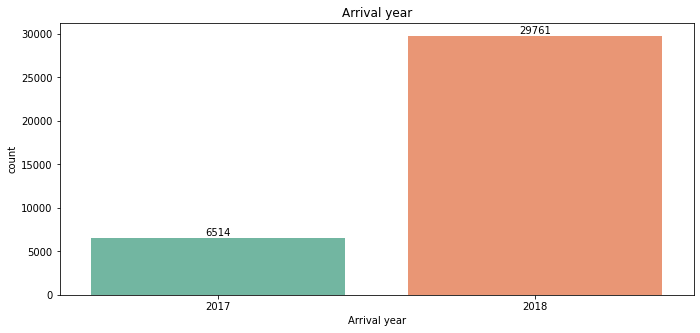

In [25]:
def year(value):
    if value == 2017:
        return 0
    else:
        return 1
    
data[["Arrival year"]] = data.apply(lambda x: year(x["Arrival year"]), axis=1)

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.gca().set_title("Arrival year")
ax=sns.countplot(x = "Arrival year", palette = 'Set2', data = data)
ax.bar_label(ax.containers[0])

plt.xticks([0,1], ["2017", "2018"])

plt.show()

## Models

In [26]:
X = data.copy().drop(["Booking ID", "Booking status"], axis=1)
y = data[["Booking status"]]

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.7, random_state=1)

### Grid Search for Logistic Regression

In [29]:
LR_pipe = Pipeline([('scl', None),
                    ('clf', LogisticRegression())
                   ])

grid_params = {'clf': [LogisticRegression()],
               'scl': [None, StandardScaler(), Normalizer()],
               'clf__max_iter' : list(range(500,1001,100)),
               'clf__solver': ['lbfgs']
              }

LR_grid = GridSearchCV(LR_pipe, grid_params, cv=5, verbose = 3)
LR_grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END clf=LogisticRegression(), clf__max_iter=500, clf__solver=lbfgs, scl=None;, score=0.783 total time=   0.2s
[CV 2/5] END clf=LogisticRegression(), clf__max_iter=500, clf__solver=lbfgs, scl=None;, score=0.775 total time=   0.0s
[CV 3/5] END clf=LogisticRegression(), clf__max_iter=500, clf__solver=lbfgs, scl=None;, score=0.793 total time=   0.0s
[CV 4/5] END clf=LogisticRegression(), clf__max_iter=500, clf__solver=lbfgs, scl=None;, score=0.759 total time=   0.1s
[CV 5/5] END clf=LogisticRegression(), clf__max_iter=500, clf__solver=lbfgs, scl=None;, score=0.787 total time=   0.1s
[CV 1/5] END clf=LogisticRegression(), clf__max_iter=500, clf__solver=lbfgs, scl=StandardScaler();, score=0.783 total time=   0.0s
[CV 2/5] END clf=LogisticRegression(), clf__max_iter=500, clf__solver=lbfgs, scl=StandardScaler();, score=0.775 total time=   0.0s
[CV 3/5] END clf=LogisticRegression(), clf__max_iter=500, clf__solver=lbfgs, scl=S

[CV 3/5] END clf=LogisticRegression(), clf__max_iter=900, clf__solver=lbfgs, scl=Normalizer();, score=0.752 total time=   0.0s
[CV 4/5] END clf=LogisticRegression(), clf__max_iter=900, clf__solver=lbfgs, scl=Normalizer();, score=0.729 total time=   0.0s
[CV 5/5] END clf=LogisticRegression(), clf__max_iter=900, clf__solver=lbfgs, scl=Normalizer();, score=0.745 total time=   0.0s
[CV 1/5] END clf=LogisticRegression(), clf__max_iter=1000, clf__solver=lbfgs, scl=None;, score=0.783 total time=   0.0s
[CV 2/5] END clf=LogisticRegression(), clf__max_iter=1000, clf__solver=lbfgs, scl=None;, score=0.775 total time=   0.1s
[CV 3/5] END clf=LogisticRegression(), clf__max_iter=1000, clf__solver=lbfgs, scl=None;, score=0.793 total time=   0.0s
[CV 4/5] END clf=LogisticRegression(), clf__max_iter=1000, clf__solver=lbfgs, scl=None;, score=0.759 total time=   0.1s
[CV 5/5] END clf=LogisticRegression(), clf__max_iter=1000, clf__solver=lbfgs, scl=None;, score=0.787 total time=   0.0s
[CV 1/5] END clf=Lo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', None),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf': [LogisticRegression(max_iter=500)],
                         'clf__max_iter': [500, 600, 700, 800, 900, 1000],
                         'clf__solver': ['lbfgs'],
                         'scl': [None, StandardScaler(), Normalizer()]},
             verbose=3)

In [30]:
LR_grid.best_params_

{'clf': LogisticRegression(max_iter=500),
 'clf__max_iter': 500,
 'clf__solver': 'lbfgs',
 'scl': None}

In [31]:
LR_grid.best_score_

0.7794523376070686

### Grid Search for kNN

In [33]:
knn_pipe = Pipeline([('scl', None),
                    ('clf', KNeighborsClassifier())
                   ])

grid_params = {'clf': [KNeighborsClassifier()],
               'scl': [None, StandardScaler(), Normalizer()],
               'clf__n_neighbors': list(range(10,20)),
               'clf__weights': ['uniform', 'distance']
              }

#Uniform: all points in each neighbourhood have equal influence in predicting class
#Distance: closer neighbours will have greater influence than neighbours further away

knn_grid = GridSearchCV(LR_pipe, grid_params, cv=5, verbose = 3)
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END clf=KNeighborsClassifier(), clf__n_neighbors=10, clf__weights=uniform, scl=None;, score=0.779 total time=   0.3s
[CV 2/5] END clf=KNeighborsClassifier(), clf__n_neighbors=10, clf__weights=uniform, scl=None;, score=0.786 total time=   0.4s
[CV 3/5] END clf=KNeighborsClassifier(), clf__n_neighbors=10, clf__weights=uniform, scl=None;, score=0.789 total time=   0.3s
[CV 4/5] END clf=KNeighborsClassifier(), clf__n_neighbors=10, clf__weights=uniform, scl=None;, score=0.773 total time=   0.3s
[CV 5/5] END clf=KNeighborsClassifier(), clf__n_neighbors=10, clf__weights=uniform, scl=None;, score=0.785 total time=   0.3s
[CV 1/5] END clf=KNeighborsClassifier(), clf__n_neighbors=10, clf__weights=uniform, scl=StandardScaler();, score=0.806 total time=   0.0s
[CV 2/5] END clf=KNeighborsClassifier(), clf__n_neighbors=10, clf__weights=uniform, scl=StandardScaler();, score=0.814 total time=   0.0s
[CV 3/5] END clf=KNeighborsClass

[CV 3/5] END clf=KNeighborsClassifier(), clf__n_neighbors=12, clf__weights=uniform, scl=None;, score=0.782 total time=   0.3s
[CV 4/5] END clf=KNeighborsClassifier(), clf__n_neighbors=12, clf__weights=uniform, scl=None;, score=0.772 total time=   0.3s
[CV 5/5] END clf=KNeighborsClassifier(), clf__n_neighbors=12, clf__weights=uniform, scl=None;, score=0.784 total time=   0.2s
[CV 1/5] END clf=KNeighborsClassifier(), clf__n_neighbors=12, clf__weights=uniform, scl=StandardScaler();, score=0.812 total time=   0.0s
[CV 2/5] END clf=KNeighborsClassifier(), clf__n_neighbors=12, clf__weights=uniform, scl=StandardScaler();, score=0.814 total time=   0.0s
[CV 3/5] END clf=KNeighborsClassifier(), clf__n_neighbors=12, clf__weights=uniform, scl=StandardScaler();, score=0.824 total time=   0.0s
[CV 4/5] END clf=KNeighborsClassifier(), clf__n_neighbors=12, clf__weights=uniform, scl=StandardScaler();, score=0.808 total time=   0.0s
[CV 5/5] END clf=KNeighborsClassifier(), clf__n_neighbors=12, clf__wei

[CV 5/5] END clf=KNeighborsClassifier(), clf__n_neighbors=14, clf__weights=uniform, scl=None;, score=0.787 total time=   0.2s
[CV 1/5] END clf=KNeighborsClassifier(), clf__n_neighbors=14, clf__weights=uniform, scl=StandardScaler();, score=0.811 total time=   0.0s
[CV 2/5] END clf=KNeighborsClassifier(), clf__n_neighbors=14, clf__weights=uniform, scl=StandardScaler();, score=0.814 total time=   0.0s
[CV 3/5] END clf=KNeighborsClassifier(), clf__n_neighbors=14, clf__weights=uniform, scl=StandardScaler();, score=0.820 total time=   0.0s
[CV 4/5] END clf=KNeighborsClassifier(), clf__n_neighbors=14, clf__weights=uniform, scl=StandardScaler();, score=0.809 total time=   0.0s
[CV 5/5] END clf=KNeighborsClassifier(), clf__n_neighbors=14, clf__weights=uniform, scl=StandardScaler();, score=0.816 total time=   0.0s
[CV 1/5] END clf=KNeighborsClassifier(), clf__n_neighbors=14, clf__weights=uniform, scl=Normalizer();, score=0.798 total time=   0.0s
[CV 2/5] END clf=KNeighborsClassifier(), clf__n_ne

[CV 2/5] END clf=KNeighborsClassifier(), clf__n_neighbors=16, clf__weights=uniform, scl=StandardScaler();, score=0.817 total time=   0.0s
[CV 3/5] END clf=KNeighborsClassifier(), clf__n_neighbors=16, clf__weights=uniform, scl=StandardScaler();, score=0.820 total time=   0.0s
[CV 4/5] END clf=KNeighborsClassifier(), clf__n_neighbors=16, clf__weights=uniform, scl=StandardScaler();, score=0.805 total time=   0.0s
[CV 5/5] END clf=KNeighborsClassifier(), clf__n_neighbors=16, clf__weights=uniform, scl=StandardScaler();, score=0.810 total time=   0.0s
[CV 1/5] END clf=KNeighborsClassifier(), clf__n_neighbors=16, clf__weights=uniform, scl=Normalizer();, score=0.791 total time=   0.0s
[CV 2/5] END clf=KNeighborsClassifier(), clf__n_neighbors=16, clf__weights=uniform, scl=Normalizer();, score=0.792 total time=   0.0s
[CV 3/5] END clf=KNeighborsClassifier(), clf__n_neighbors=16, clf__weights=uniform, scl=Normalizer();, score=0.792 total time=   0.0s
[CV 4/5] END clf=KNeighborsClassifier(), clf__

[CV 4/5] END clf=KNeighborsClassifier(), clf__n_neighbors=18, clf__weights=uniform, scl=StandardScaler();, score=0.807 total time=   0.0s
[CV 5/5] END clf=KNeighborsClassifier(), clf__n_neighbors=18, clf__weights=uniform, scl=StandardScaler();, score=0.813 total time=   0.0s
[CV 1/5] END clf=KNeighborsClassifier(), clf__n_neighbors=18, clf__weights=uniform, scl=Normalizer();, score=0.794 total time=   0.0s
[CV 2/5] END clf=KNeighborsClassifier(), clf__n_neighbors=18, clf__weights=uniform, scl=Normalizer();, score=0.786 total time=   0.0s
[CV 3/5] END clf=KNeighborsClassifier(), clf__n_neighbors=18, clf__weights=uniform, scl=Normalizer();, score=0.786 total time=   0.0s
[CV 4/5] END clf=KNeighborsClassifier(), clf__n_neighbors=18, clf__weights=uniform, scl=Normalizer();, score=0.783 total time=   0.0s
[CV 5/5] END clf=KNeighborsClassifier(), clf__n_neighbors=18, clf__weights=uniform, scl=Normalizer();, score=0.794 total time=   0.0s
[CV 1/5] END clf=KNeighborsClassifier(), clf__n_neighb

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', None),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf': [KNeighborsClassifier(n_neighbors=14,
                                                      weights='distance')],
                         'clf__n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17,
                                              18, 19],
                         'clf__weights': ['uniform', 'distance'],
                         'scl': [None, StandardScaler(), Normalizer()]},
             verbose=3)

In [34]:
knn_grid.best_params_

{'clf': KNeighborsClassifier(n_neighbors=14, weights='distance'),
 'clf__n_neighbors': 14,
 'clf__weights': 'distance',
 'scl': StandardScaler()}

In [35]:
knn_grid.best_score_

0.8355085502850658

### Grid Search for MLP NN

In [36]:
from sklearn.neural_network import MLPClassifier

In [43]:
X_std = StandardScaler().fit_transform(X)
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y.values.ravel(), test_size=0.7, random_state=1)

NN = MLPClassifier(learning_rate='adaptive', max_iter=5000)

grid_params = {'activation': ['logistic', 'relu', 'tanh'],
               'alpha': np.logspace(-3, -1, 3),
               'hidden_layer_sizes': [(10, 10),
                                           (20, 10),
                                           (20, 10, 10),
                                           (30, 20, 10)],
              }

NN_grid = GridSearchCV(NN, grid_params, cv=3, verbose = 3)
NN_grid.fit(X_std_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 10);, score=0.812 total time=   4.8s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 10);, score=0.814 total time=   4.8s
[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 10);, score=0.811 total time=   5.9s
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 10);, score=0.815 total time=   8.5s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 10);, score=0.825 total time=   9.7s
[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 10);, score=0.822 total time=   7.4s
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 10, 10);, score=0.818 total time=  13.4s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 10, 10);, score=0.819 total time=   8.4s
[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=

[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10);, score=0.820 total time=   9.7s
[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 10);, score=0.823 total time=  12.5s
[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 10);, score=0.829 total time=  12.6s
[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 10);, score=0.824 total time=  12.5s
[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 20, 10);, score=0.809 total time=  15.1s
[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 20, 10);, score=0.818 total time=  21.0s
[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 20, 10);, score=0.824 total time=  23.5s
[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10);, score=0.819 total time=   6.7s
[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10);, score=0.814 total time=   3.8s
[CV 3/3] END activation=tanh, alpha=0.01, 

GridSearchCV(cv=3,
             estimator=MLPClassifier(learning_rate='adaptive', max_iter=5000),
             param_grid={'activation': ['logistic', 'relu', 'tanh'],
                         'alpha': array([0.001, 0.01 , 0.1  ]),
                         'hidden_layer_sizes': [(10, 10), (20, 10),
                                                (20, 10, 10), (30, 20, 10)]},
             verbose=3)

In [44]:
NN_grid.best_params_

{'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (30, 20, 10)}

In [45]:
NN_grid.best_score_

0.828524241450585

### Confusion matrices

              precision    recall  f1-score   support

           0       0.81      0.88      0.85     17064
           1       0.71      0.58      0.64      8329

    accuracy                           0.78     25393
   macro avg       0.76      0.73      0.74     25393
weighted avg       0.78      0.78      0.78     25393



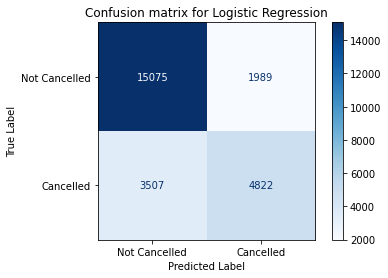

In [46]:
LR_pred = LR_grid.predict(X_test)
print(classification_report(y_test, LR_pred))


color = 'k'
matrix = ConfusionMatrixDisplay.from_estimator(LR_grid, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.title('Confusion matrix for Logistic Regression')
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.xticks([0,1],["Not Cancelled", "Cancelled"])
plt.yticks([0,1],["Not Cancelled", "Cancelled"])
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     17064
           1       0.77      0.71      0.74      8329

    accuracy                           0.84     25393
   macro avg       0.82      0.80      0.81     25393
weighted avg       0.83      0.84      0.83     25393



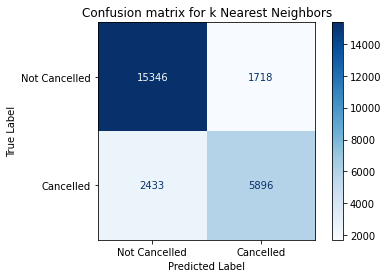

In [50]:
knn_pred = knn_grid.predict(X_test)
print(classification_report(y_test, knn_pred))


color = 'k'
matrix = ConfusionMatrixDisplay.from_estimator(knn_grid, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.title('Confusion matrix for k Nearest Neighbors')
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.xticks([0,1],["Not Cancelled", "Cancelled"])
plt.yticks([0,1],["Not Cancelled", "Cancelled"])
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     17064
           1       0.78      0.70      0.74      8329

    accuracy                           0.84     25393
   macro avg       0.82      0.80      0.81     25393
weighted avg       0.83      0.84      0.83     25393



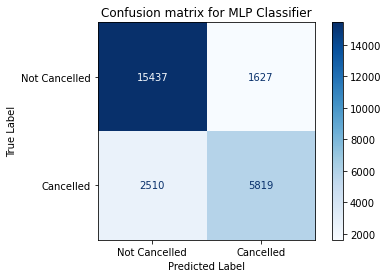

In [51]:
NN_pred = NN_grid.predict(X_std_test)
print(classification_report(y_test, NN_pred))


color = 'k'
matrix = ConfusionMatrixDisplay.from_estimator(NN_grid, X_std_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.title('Confusion matrix for MLP Classifier')
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.xticks([0,1],["Not Cancelled", "Cancelled"])
plt.yticks([0,1],["Not Cancelled", "Cancelled"])
plt.show()